In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Data ingestion 

In [2]:
data = pd.read_csv('data/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,LE,Adult_mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness _1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
data.shape

(2938, 22)

### Handling the missing values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   LE                               2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

### Here, the target column is life expectancy

In [5]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
LE                                  10
Adult_mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
 thinness _1-19 years               34
 thinness_5-9 years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [6]:
data.dropna(subset=['LE'], inplace=True)

In [7]:
data.LE.shape

(2928,)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   LE                               2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage_expenditure           2928 non-null   float64
 8   Hepatitis_B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five_deaths                2928 non-null   int64  
 12  Polio                    

In [9]:
data.Alcohol.fillna(data.Alcohol.mode().values[0], inplace=True)

In [10]:
data.Alcohol.isnull().sum()

0

In [11]:
data.Alcohol.shape

(2928,)

In [12]:
data.columns

Index(['Country', 'Year', 'Status', 'LE', 'Adult_mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles ', 'BMI ',
       'under-five_deaths ', 'Polio', 'Total_expenditure', 'Diphtheria ',
       'HIV/AIDS', 'GDP', 'Population', ' thinness _1-19 years',
       ' thinness_5-9 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [13]:
data = data.rename(columns={'Measles ': 'Measles'})

In [14]:
data = data.rename(columns={'BMI ': 'BMI'})

In [15]:
data = data.rename(columns={'Diphtheria ': 'Diphtheria'})

In [16]:
data.columns

Index(['Country', 'Year', 'Status', 'LE', 'Adult_mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths ', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', ' thinness _1-19 years',
       ' thinness_5-9 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [17]:
data.BMI.isnull().sum()

32

In [18]:
data.BMI.fillna(data.BMI.mode().values[0], inplace=True)

In [19]:
data.BMI.isnull().sum()

0

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   LE                               2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2928 non-null   int64  
 6   Alcohol                          2928 non-null   float64
 7   percentage_expenditure           2928 non-null   float64
 8   Hepatitis_B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2928 non-null   float64
 11  under-five_deaths                2928 non-null   int64  
 12  Polio                    

In [21]:
data.Hepatitis_B.fillna(data.Hepatitis_B.mode().values[0], inplace=True)
data.Polio.fillna(data.Polio.mode().values[0], inplace=True)
data.Diphtheria.fillna(data.Diphtheria.mode().values[0], inplace=True)
data.GDP.fillna(data.GDP.mode().values[0], inplace=True)
data.Population.fillna(data.Population.mode().values[0], inplace=True)
data.Schooling.fillna(data.Schooling.mode().values[0], inplace=True)
data.Total_expenditure.fillna(data.Total_expenditure.mode().values[0], inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   LE                               2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2928 non-null   int64  
 6   Alcohol                          2928 non-null   float64
 7   percentage_expenditure           2928 non-null   float64
 8   Hepatitis_B                      2928 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2928 non-null   float64
 11  under-five_deaths                2928 non-null   int64  
 12  Polio                    

### Removing unwanted columns

In [23]:
data.drop(columns=['Country','Year','Status',' thinness _1-19 years',' thinness_5-9 years','Income_composition_of_resources' ], axis='1', inplace=True)

In [24]:
data.shape

(2928, 16)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LE                      2928 non-null   float64
 1   Adult_mortality         2928 non-null   float64
 2   infant_deaths           2928 non-null   int64  
 3   Alcohol                 2928 non-null   float64
 4   percentage_expenditure  2928 non-null   float64
 5   Hepatitis_B             2928 non-null   float64
 6   Measles                 2928 non-null   int64  
 7   BMI                     2928 non-null   float64
 8   under-five_deaths       2928 non-null   int64  
 9   Polio                   2928 non-null   float64
 10  Total_expenditure       2928 non-null   float64
 11  Diphtheria              2928 non-null   float64
 12  HIV/AIDS                2928 non-null   float64
 13  GDP                     2928 non-null   float64
 14  Population              2928 non-null   float

In [26]:
data.isna().sum()

LE                        0
Adult_mortality           0
infant_deaths             0
Alcohol                   0
percentage_expenditure    0
Hepatitis_B               0
Measles                   0
BMI                       0
under-five_deaths         0
Polio                     0
Total_expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
Schooling                 0
dtype: int64

In [27]:
data.describe()

,LE,Adult_mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000
mean,69.224932,164.796448,30.407445,4.311325,740.321185,84.367828,2427.855874,38.456865,42.179303,82.655055,5.827493,82.429645,1.747712,6360.607403,9.957138e+06,12.048839
std,9.523867,124.292079,118.114450,4.078315,1990.930605,23.612092,11485.970937,19.961721,160.700547,23.377910,2.411757,23.667506,5.085542,13428.365066,5.416502e+07,3.260122
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.000000
25%,63.100000,74.000000,0.000000,0.480000,4.853964,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,193.603049,6.490250e+03,10.300000
50%,72.100000,144.000000,3.000000,3.150000,65.611455,95.000000,17.000000,43.800000,4.000000,93.000000,5.530000,93.000000,0.100000,1174.020734,5.459175e+05,12.500000
75%,75.700000,228.000000,22.000000,7.400000,442.614322,99.000000,362.250000,56.400000,28.000000,97.000000,7.330000,97.000000,0.800000,4793.630903,4.592777e+06,14.100000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,20.700000


### From the numeric metrics above, minimum and maximum values of life expentency is 36.3 and 89 respectively. Also the mean value is 69.22. Creating a box plot to visualize the label data

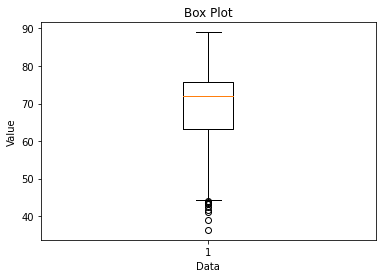

In [28]:
# Create a figure and an axes object

fig, ax = plt.subplots()

#generate the box plot
ax.boxplot(data.LE)

#styling the chart
ax.set_title('Box Plot')
ax.set_xlabel('Data')
ax.set_ylabel('Value')

plt.show()

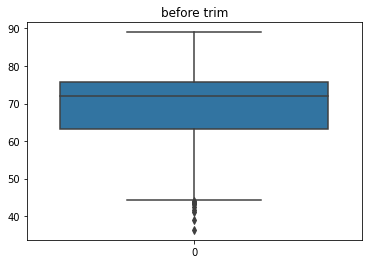

In [29]:
sns.boxplot(data.LE)
plt.title('before trim')
plt.show()

### Removing outliers from the datasets. Using IQR (inter quartile range)

(2918, 16)


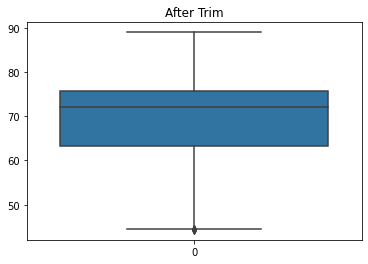

In [34]:
Q1 = data['LE'].quantile(0.25)
Q3 = data['LE'].quantile(0.75)
IQR = Q3 - Q1
data_trim = data[~((data.LE < (Q1 - 1.5 * IQR)) |(data.LE > (Q3 + 1.5 * IQR)))]
print(data_trim.shape)
sns.boxplot(data_trim.LE)
plt.title("After Trim")
plt.show()

### Data exploration

<AxesSubplot:xlabel='LE', ylabel='count'>

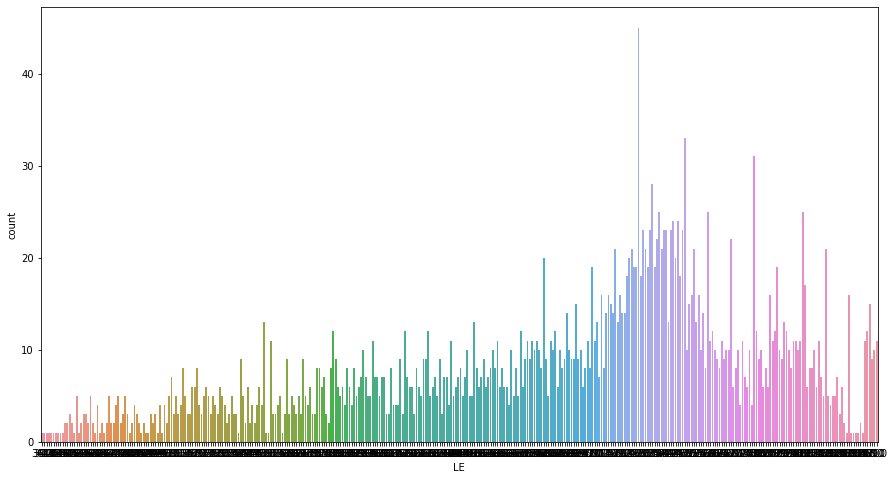

In [35]:
# Countplot over target variable
plt.figure(figsize=(15,8))
sns.countplot(x='LE', data=data)

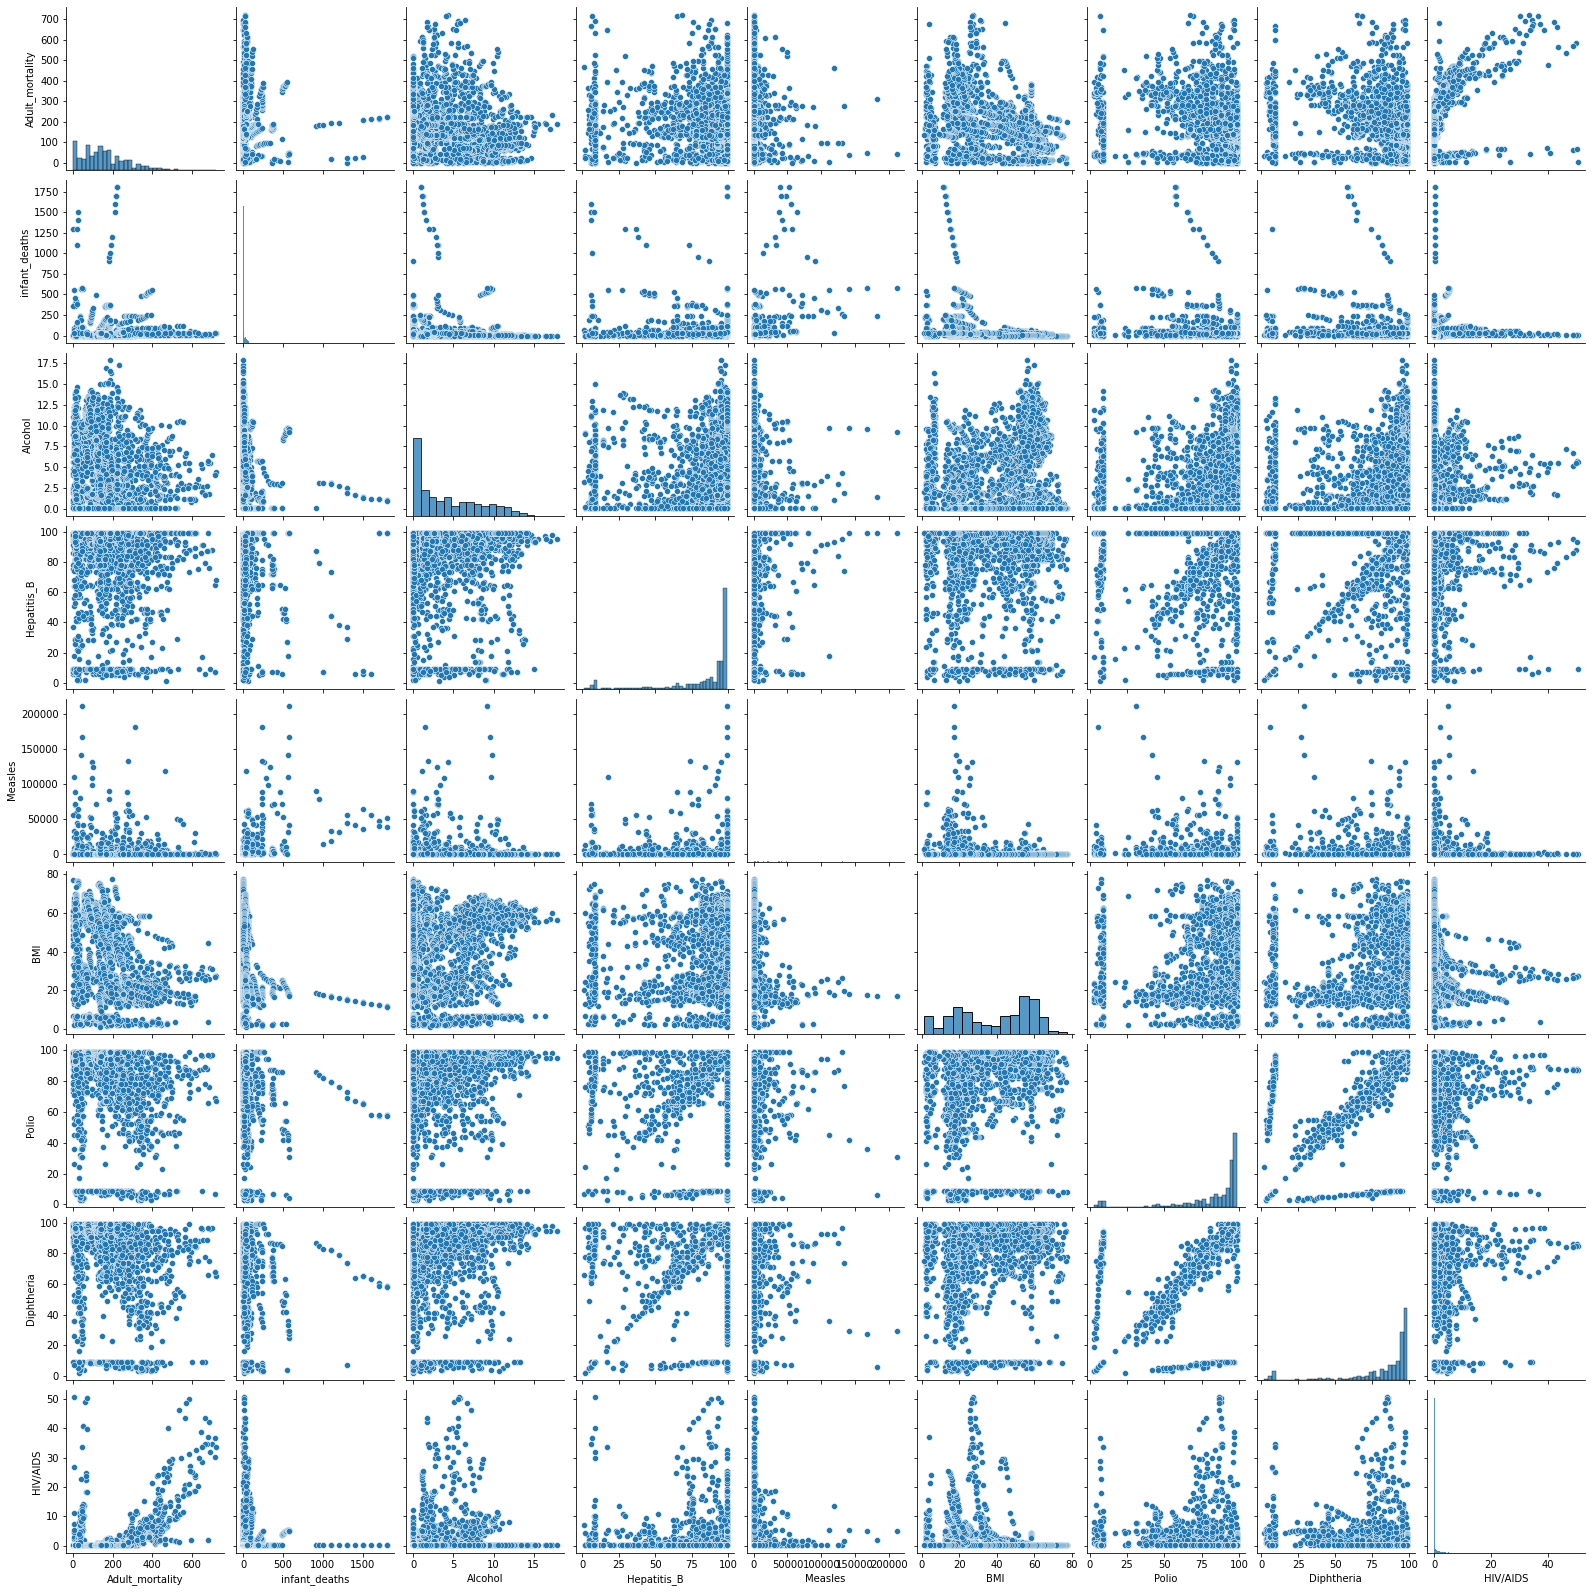

In [37]:
# Pairplot over the target variable
sns.pairplot(data[['Adult_mortality', 'infant_deaths','Alcohol','Hepatitis_B','Measles','BMI','Polio','Diphtheria','HIV/AIDS']])

array([[<AxesSubplot:title={'center':'LE'}>,
        <AxesSubplot:title={'center':'Adult_mortality'}>,
        <AxesSubplot:title={'center':'infant_deaths'}>,
        <AxesSubplot:title={'center':'Alcohol'}>],
       [<AxesSubplot:title={'center':'percentage_expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis_B'}>,
        <AxesSubplot:title={'center':'Measles'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'under-five_deaths '}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total_expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>],
       [<AxesSubplot:title={'center':'HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Schooling'}>]], dtype=object)

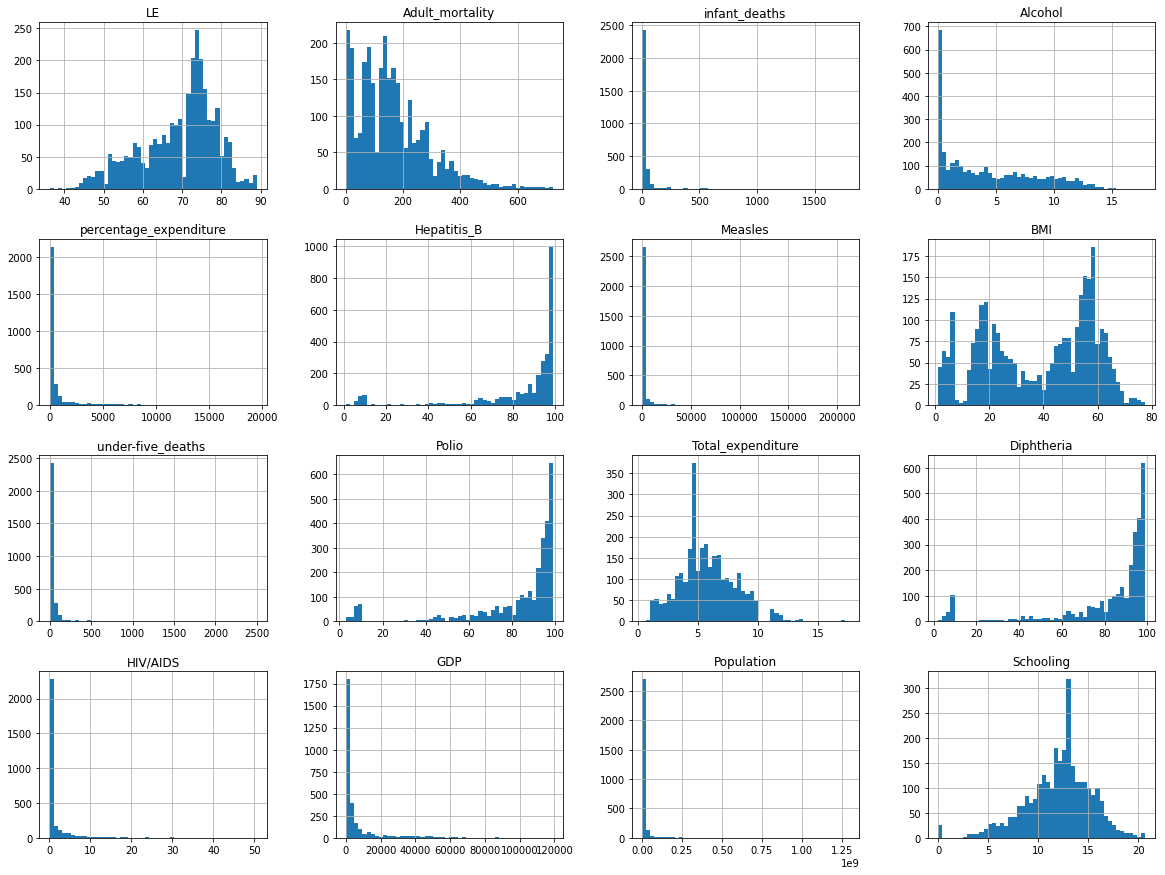

In [38]:
# # Histogram
data.hist(bins=50,figsize=(20,15))

In [39]:
corr_matrix=data.corr()
correlation_values=corr_matrix['LE'].sort_values(ascending=False)
print(correlation_values)

LE                        1.000000
Schooling                 0.713779
BMI                       0.546055
Diphtheria                0.471215
Polio                     0.457395
GDP                       0.429103
percentage_expenditure    0.381864
Alcohol                   0.370490
Total_expenditure         0.207360
Hepatitis_B               0.148128
Population               -0.029949
Measles                  -0.157586
infant_deaths            -0.196557
under-five_deaths        -0.222529
HIV/AIDS                 -0.556556
Adult_mortality          -0.696359
Name: LE, dtype: float64


###  Here, the features are sorted on ascending order of correlation with LE (target variable)

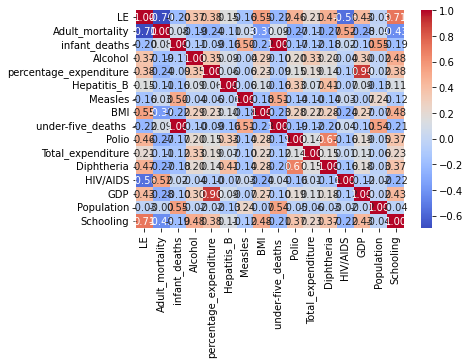

In [42]:
# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm",fmt=".2f")

plt.show()

array([[<AxesSubplot:xlabel='LE', ylabel='LE'>,
        <AxesSubplot:xlabel='Schooling', ylabel='LE'>,
        <AxesSubplot:xlabel='BMI', ylabel='LE'>,
        <AxesSubplot:xlabel='Polio', ylabel='LE'>,
        <AxesSubplot:xlabel='Diphtheria', ylabel='LE'>,
        <AxesSubplot:xlabel='GDP', ylabel='LE'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='LE'>],
       [<AxesSubplot:xlabel='LE', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Schooling', ylabel='Schooling'>,
        <AxesSubplot:xlabel='BMI', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Polio', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Diphtheria', ylabel='Schooling'>,
        <AxesSubplot:xlabel='GDP', ylabel='Schooling'>,
        <AxesSubplot:xlabel='Alcohol', ylabel='Schooling'>],
       [<AxesSubplot:xlabel='LE', ylabel='BMI'>,
        <AxesSubplot:xlabel='Schooling', ylabel='BMI'>,
        <AxesSubplot:xlabel='BMI', ylabel='BMI'>,
        <AxesSubplot:xlabel='Polio', ylabel='BMI'>,
        <AxesSubplot

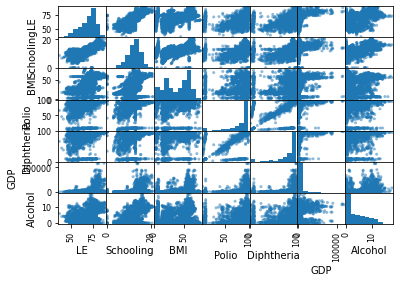

In [46]:
from pandas.plotting import scatter_matrix
attributes=['LE','Schooling','BMI','Polio','Diphtheria','GDP','Alcohol']
scatter_matrix(data[attributes])

### Based on the correlation outcomes, choose few important features

In [47]:
# So, we will be using following variables as independent variables for our model.
data=data[['LE','Schooling','BMI','Polio','Diphtheria','GDP','Alcohol']]
data.head()

,LE,Schooling,BMI,Polio,Diphtheria,GDP,Alcohol
0,65.0,10.1,19.1,6.0,65.0,584.259210,0.01
1,59.9,10.0,18.6,58.0,62.0,612.696514,0.01
2,59.9,9.9,18.1,62.0,64.0,631.744976,0.01
3,59.5,9.8,17.6,67.0,67.0,669.959000,0.01
4,59.2,9.5,17.2,68.0,68.0,63.537231,0.01


## Training and testing the model

### Dividing data into x as features and y as outcomes

In [48]:
x=data.drop('LE',axis=1) 
y=data['LE']

In [49]:
x.head()

,Schooling,BMI,Polio,Diphtheria,GDP,Alcohol
0,10.1,19.1,6.0,65.0,584.259210,0.01
1,10.0,18.6,58.0,62.0,612.696514,0.01
2,9.9,18.1,62.0,64.0,631.744976,0.01
3,9.8,17.6,67.0,67.0,669.959000,0.01
4,9.5,17.2,68.0,68.0,63.537231,0.01


In [50]:
y.tail()

2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: LE, dtype: float64

### Train-test split data

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
x_train.count()

Schooling     2342
BMI           2342
Polio         2342
Diphtheria    2342
GDP           2342
Alcohol       2342
dtype: int64

In [54]:
x_test.count()

Schooling     586
BMI           586
Polio         586
Diphtheria    586
GDP           586
Alcohol       586
dtype: int64

### To free up some memory deleting intermediate

In [55]:
del x, y

### Train and evaluate function

In [56]:
def train(x_train, y_train, model, hyperparameters):
    """
    Arguments:
    x_train -- input features of the training set
    y_train -- target values of the training set
    model -- an instance of the model class (e.g. LogisticRegression, Knn, etc.)
    hyperparameters -- dictionary of list of hyperparameter values
    
    Returns:
    best_params -- dictionary of best hyperparameters found
    best_model -- an instance of the model class with tuned hyperparameters
    """
    
    #perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5)
    grid_search.fit(x_train, y_train)
    
    # Print the best hyperparameters found
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    
    # Train the model with best hyperparameters
    best_model = model.set_params(**best_params)
    best_model.fit(x_train, y_train)
    
    return best_params, best_model

In [70]:
def evaluate_model(x_test, y_test, best_model):
    """
    Arguments:
    best model -- an instance of the model class with tuned hyperparameters
    x_test -- input features of the test set
    y_test -- target values of the test set
    
    Returns:
    accuracy -- accuracy score on the test set
    precision -- precision score on the test set
    recall -- recall score on the test set
    f1_score -- f1 score on the test set
    """
    # Predict the target values of the test set
    y_pred = best_model.predict(x_test)
    
     # calculate evaluation metrics
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print('rmse scores: ',rmse)
    mae=mean_absolute_error(y_test,y_pred)
    print('mean absolute error scores: ',rmse)
    r2_score=metrics.r2_score(y_test,y_pred)
    print('r2 scores: ',r2_score)   # r2_score=1 means better model

def another_evaluation_way(x_test, y_test, best_model):
    scores=cross_val_score(best_model,x_test,y_test,scoring='neg_mean_squared_error',cv=10)
    rmse=np.sqrt(-scores)

    #     print('rmse scores: ',rmse)
    print('rmse with CV mean: ',rmse.mean())
    print('rmse with CV standard deviation: ',rmse.std())

### K-nearest neighbours (KNN)

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [71]:
hyperparameters={
    'copy_X': [True,False],
    'fit_intercept': [True,False],
    'n_jobs': [-1,1,2],
}
model=LinearRegression()
_,best_model1 = train(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model1)
another_evaluation_way(x_test, y_test, best_model1)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
rmse scores:  5.475696324238852
mean absolute error scores:  5.475696324238852
r2 scores:  0.6533704345906176
rmse with CV mean:  5.511758599095424
rmse with CV standard deviation:  0.598908427676072


### Ridge regression

In [73]:
hyperparameters={
    'alpha': [1],
    'solver': ["cholesky"],
    'fit_intercept': [False],
}
model=Ridge()
_,best_model2 = train(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model2)
another_evaluation_way(x_test, y_test, best_model2)

Best Hyperparameters: {'alpha': 1, 'fit_intercept': False, 'solver': 'cholesky'}
rmse scores:  9.775649739243708
mean absolute error scores:  9.775649739243708
r2 scores:  -0.10478598994106414
rmse with CV mean:  9.85675994779553
rmse with CV standard deviation:  1.2011659956682217


In [75]:
hyperparameters={
    'max_depth': [2,3,4],
    'min_samples_split': [5,6,7,8,9,10,11,12,13,14],
}
model=DecisionTreeRegressor()
_,best_model5 = train(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model5)
another_evaluation_way(x_test, y_test, best_model5)

Best Hyperparameters: {'max_depth': 4, 'min_samples_split': 11}
rmse scores:  4.908004656340846
mean absolute error scores:  4.908004656340846
r2 scores:  0.7215181948101547
rmse with CV mean:  5.56988946680477
rmse with CV standard deviation:  0.8421564581884555


In [ ]:
hyperparameters={
    'n_estimators': [50,100,150,200,250],
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4,5],
}
model=RandomForestRegressor()
_,best_model6 = train(x_train, y_train, model, hyperparameters)
evaluate_model(x_test, y_test, best_model6)
another_evaluation_way(x_test, y_test, best_model6)